In [525]:
import os
import pickle

In [526]:
result_path = './work_dirs/vectormapnet_ld_mini_city/result_ld.pkl'

with open(result_path, 'rb') as f:
    results = pickle.load(f)

results.keys()

dict_keys(['meta', 'results', 'groundTruth'])

In [527]:
results['meta']

{'use_camera': False,
 'use_lidar': True,
 'use_radar': False,
 'use_map': False,
 'use_external': False}

In [528]:
len(results['results'])

1

In [529]:
results['results'][0]

[{'pts': array([[ -0.12515645,  -7.66331658],
         [ 38.42302879,  -7.66331658],
         [100.        ,  -8.91959799]]),
  'pts_num': 3,
  'type': 3,
  'bbox': array([8.356241e-03, 6.726472e-02, 8.000000e+02, 1.600627e-01],
        dtype=float32),
  'confidence_level': 0.46548337},
 {'pts': array([[ -0.12515645,   9.42211055],
         [ 31.66458073,   8.66834171],
         [ 57.44680851,   8.91959799],
         [100.        ,  14.94974874]]),
  'pts_num': 4,
  'type': 3,
  'bbox': array([4.9140111e-02, 6.0477440e+01, 7.9999896e+02, 7.8348717e+01],
        dtype=float32),
  'confidence_level': 0.28807205},
 {'pts': array([[-0.12515645,  1.38190955],
         [14.14267835,  1.88442211]]),
  'pts_num': 2,
  'type': 2,
  'bbox': array([1.05498604e-01, 9.50359058e+00, 1.20431473e+02, 1.30795298e+01],
        dtype=float32),
  'confidence_level': 0.27379388},
 {'pts': array([[-0.12515645, 14.44723618],
         [35.66958698, 14.69849246],
         [55.19399249, 13.94472362],
         [

In [530]:
len(results['results'][0])

70

In [531]:
import matplotlib.pyplot as plt
import numpy as np

In [532]:
color_map = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y',
    4: 'c',
    5: 'm',
    6: 'k',
}

close_map = {
    0: True,
    1: False,
    2: False,
    3: False,
    4: False,
    5: True,
}

In [533]:
len(results['groundTruth'])

1

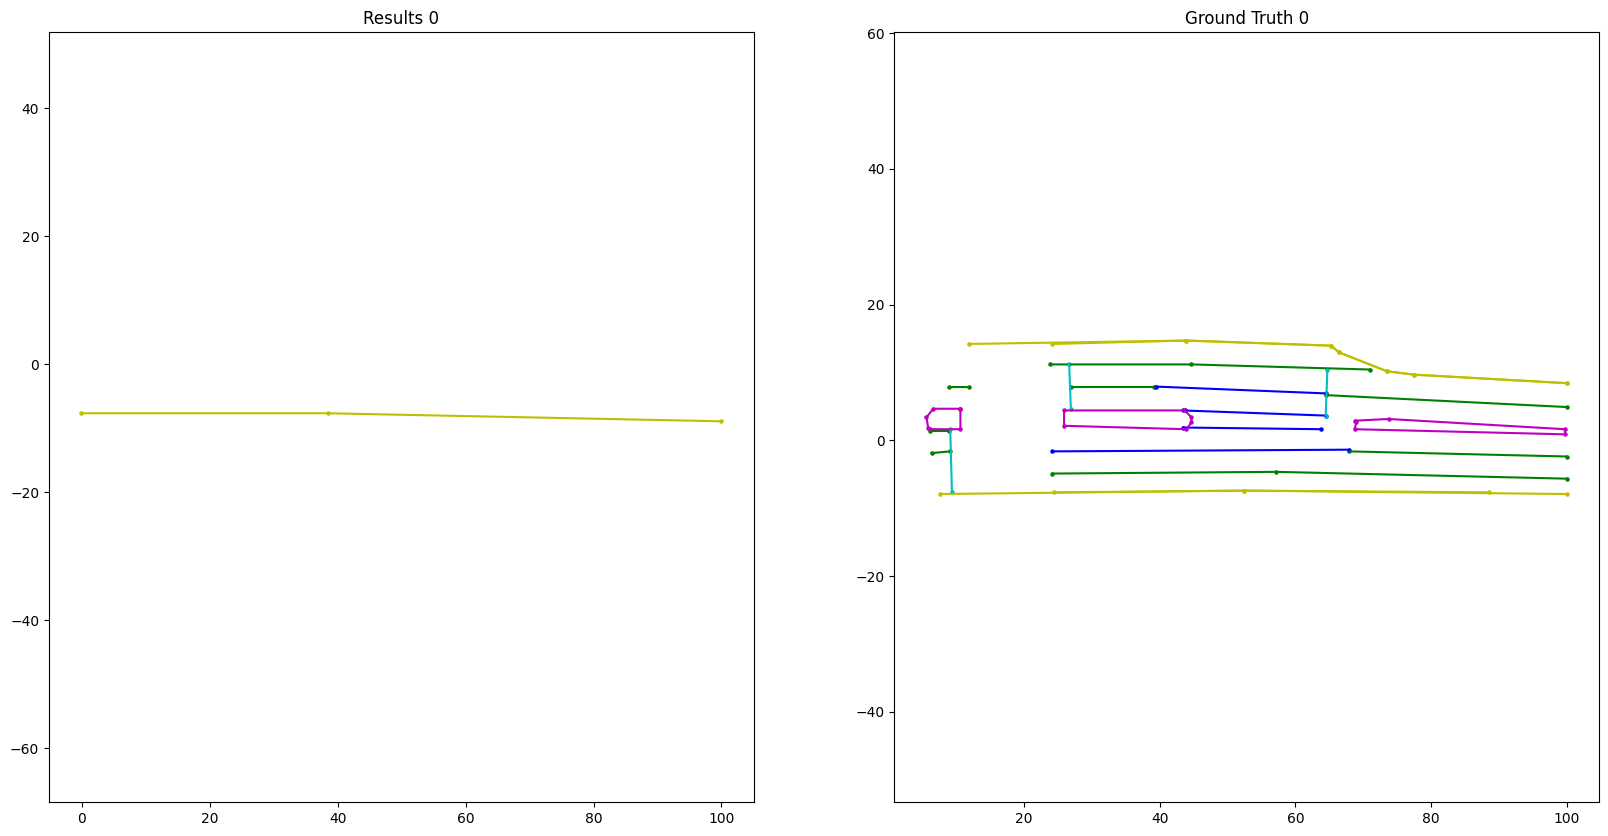

In [534]:
# plot a list of 2D points (x, y), the input is a ndarray of shape (N, 2)
# connect the points in the order of the list

def plot_points(points, color='b', marker='o', s=5, close = True):

    # points: ndarray of shape (N, 2)

    plt.scatter(points[:, 0], points[:, 1], c=color, marker=marker, s=s)
    plt.plot(points[:, 0], points[:, 1], c=color)

    # connect the first and last points
    if close:
        plt.plot([points[0][0], points[-1][0]], [points[0][1], points[-1][1]], c=color)

def plot_samples(samples: list, break_point = 10, title = 'Ground Truth', confidence_level: float = None):
    for i, sample in enumerate(samples):
        if break_point is not None and i >= break_point:
            break
        fig = plt.figure(figsize=(20, 10))
        plt.title(f'{title} {i}')
        plt.axis('equal')
        for line in sample:
            if confidence_level is not None and line['confidence_level'] < confidence_level:
                continue
            plot_points(line['pts'], color=color_map[line['type']], close=close_map[line['type']])

def plot_results_and_ground_truth(results: list, gt: list, interval: int = None, break_point: int = None, confidence_level: float = None):

    def fix_range():
        plt.axis('equal')
        # fix range
        # plt.xlim(-10, 60)
        # plt.ylim(-15, 5)

    # plot side by side use sub
    for i, (result, ground_truth) in enumerate(zip(results, gt)):
        if break_point is not None and i >= break_point:
            break
        
        if interval is not None and i % interval != 0:
            continue
        
        fig = plt.figure(figsize=(20, 10))

        plt.subplot(1, 2, 1)
        plt.title(f'Results {i}')
        fix_range()
        for line in result:
            if confidence_level is not None and line['confidence_level'] < confidence_level:
                continue
            plot_points(line['pts'], color=color_map[line['type']], close=close_map[line['type']])

        plt.subplot(1, 2, 2)
        plt.title(f'Ground Truth {i}')
        fix_range()
        for line in ground_truth:
            plot_points(line['pts'], color=color_map[line['type']], close=close_map[line['type']])

plot_results_and_ground_truth(results['results'], results['groundTruth'], confidence_level=0.3, interval=None)

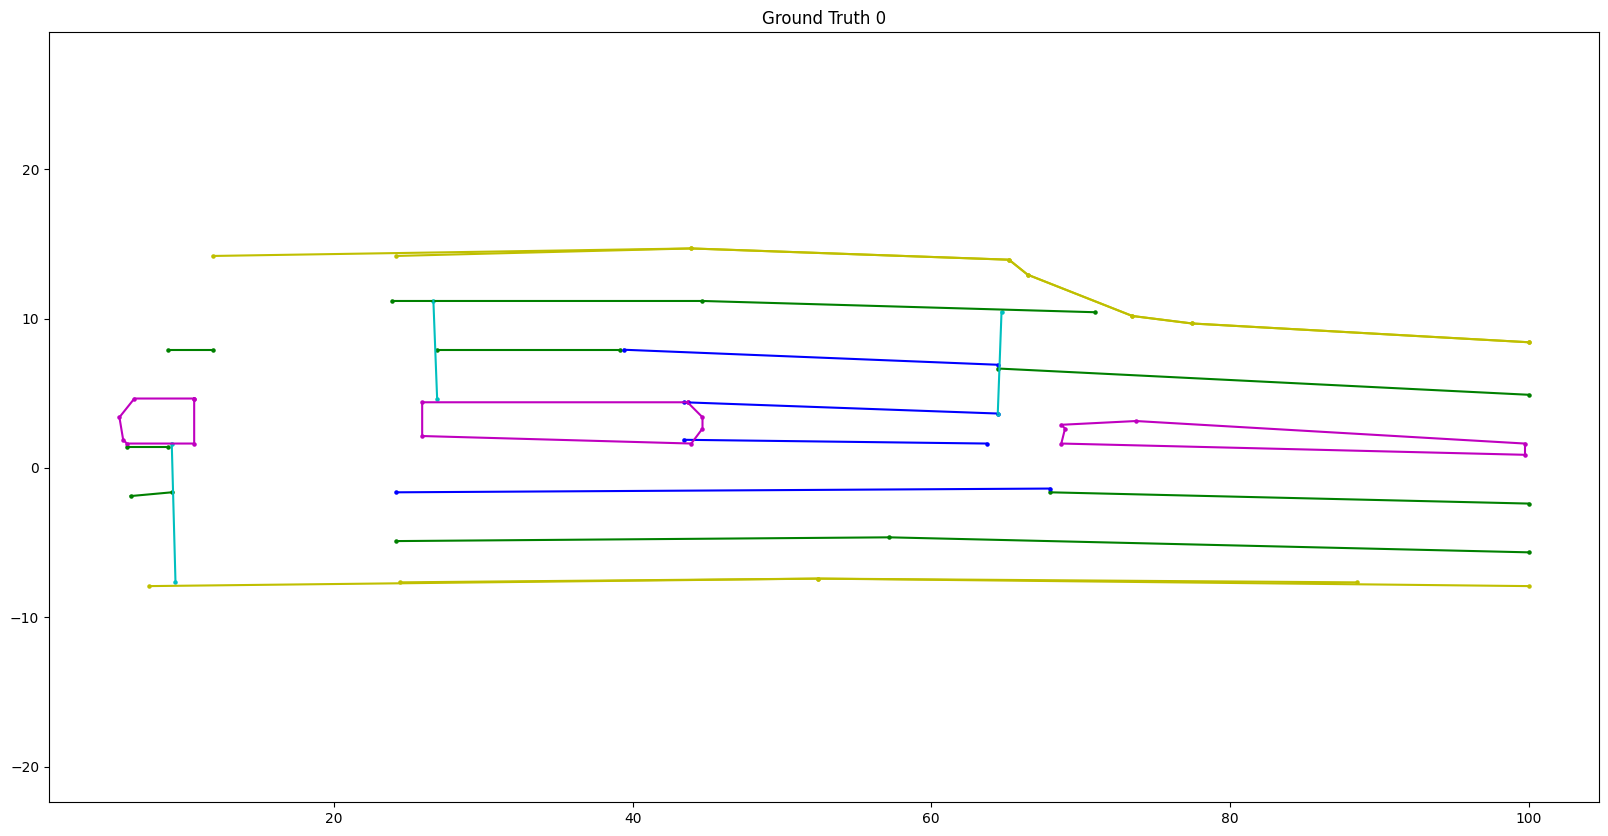

In [535]:
plot_samples(results['groundTruth'], break_point=1)

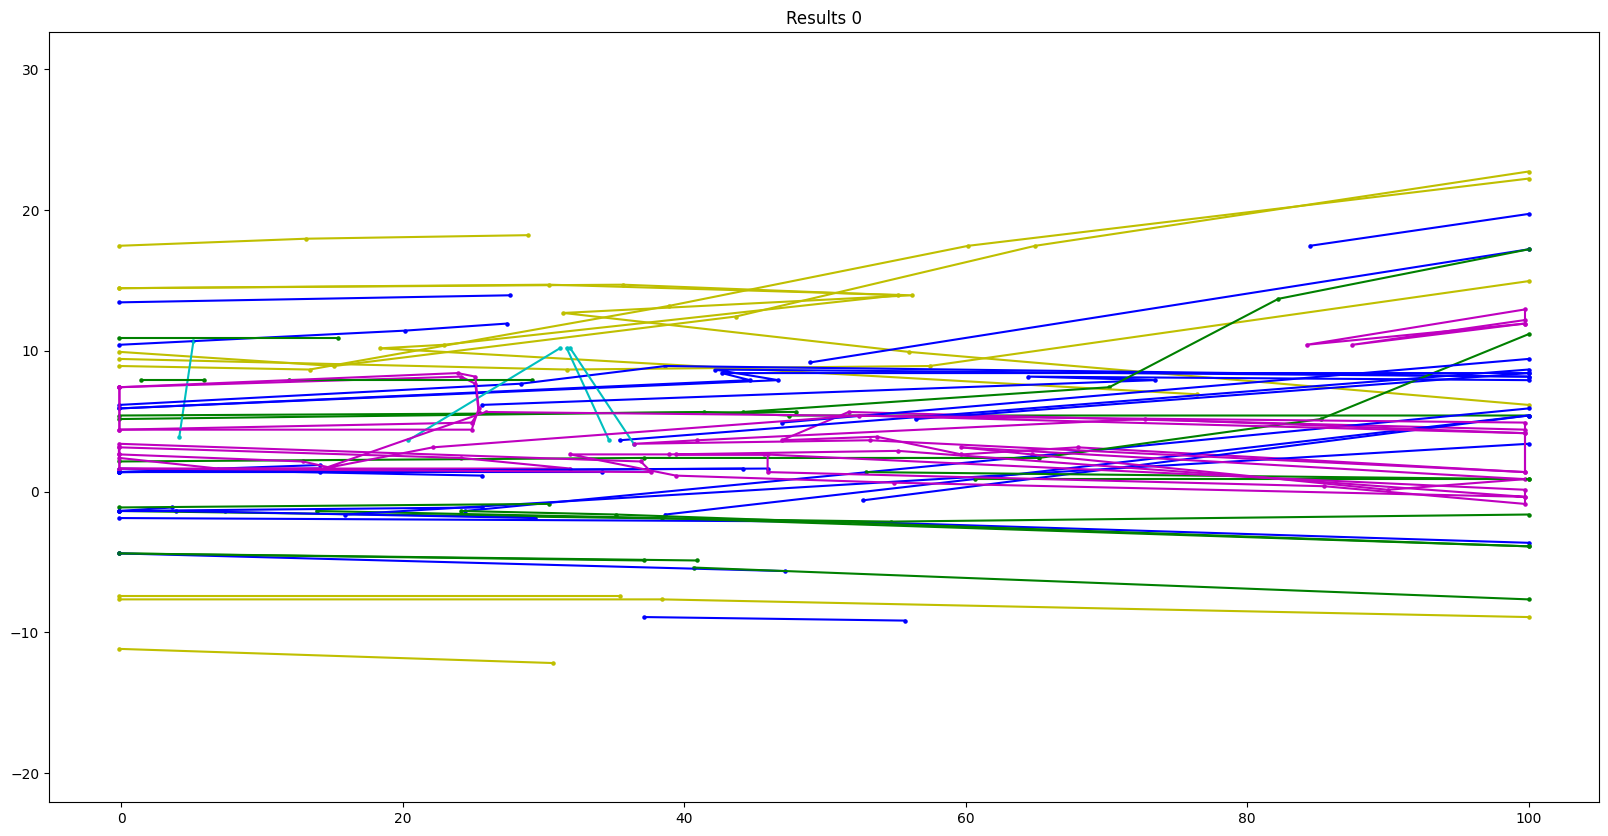

In [536]:
plot_samples(results['results'], break_point=1, title='Results', confidence_level=0.0)

In [537]:
# def plot_bbox(bbox, color='b', marker='o', s=5, close = True):
#     # bbox: ndarray of shape (x1, y1, x2, y2)
#     # draw a rectangle with corners (x1, y1) and (x2, y2)
#
#     plt.plot([bbox[0], bbox[2]], [bbox[1], bbox[1]], c=color)
#     plt.plot([bbox[0], bbox[2]], [bbox[3], bbox[3]], c=color)
#     plt.plot([bbox[0], bbox[0]], [bbox[1], bbox[3]], c=color)
#     plt.plot([bbox[2], bbox[2]], [bbox[1], bbox[3]], c=color)
#
#
# def plot_det_results(vectors: dict, confidence_level: float = 0.9):
#
#
#     count = 0
#     for i in vectors:
#         if i['confidence_level'] < confidence_level:
#             continue
#         plot_bbox(i['bbox'])
#         count += 1
#     print(f"output {count} / {len(vectors)} vectors")
#
#
# results['results']['vectors'][1]
# plot_bbox(results['results']['vectors'][1]['bbox'])
# # plot_det_results(results['results']['vectors'], confidence_level=0.9)

In [538]:
# def plot_polyline(vector: dict, do_plot_bbox: bool = False):
#     # plot polyline
#     for i in range(vector['pts_num'] - 1):
#         plt.plot([vector['pts'][i][0], vector['pts'][i+1][0]], [vector['pts'][i][1], vector['pts'][i+1][1]], c='b')
#
#     if do_plot_bbox:
#         print(vector['bbox'])
#         plot_bbox(vector['bbox'])
#
#
# results['results']['vectors'][1]
# plot_polyline(results['results']['vectors'][1], True)

In [539]:
# # read the ground truth from pickle file
# ann = "/home/yinwu/Workspace/LiangDao/algorithm/workspace/vectormap_builder/map_infos.pkl"
# plt.axis('equal')
# with open(ann, 'rb') as f:
#     map_infos = pickle.load(f)
#
# map_info = map_infos[0]
# for k, v in map_info.items():
#     assert k in {"lane", "road_boundary"}
#
#     if k == "lane":
#         c =  'g'
#     else:
#         c = 'b'
#
#     for polyline in v:
#         # polyline: array of shape (N, 2)
#         for i in range(polyline.shape[0] - 1):
#             plt.plot([polyline[i][0], polyline[i+1][0]], [polyline[i][1], polyline[i+1][1]], c=c)


The groundTruth and map_infos are very different in visualization, so we need to check the data format.

In [540]:
# def normalize(lines: np.ndarray):
#     roi_size = (200, 200)
#
#     x_roi_min, y_roi_min = -roi_size[0] / 2, -roi_size[1] / 2
#     x_roi_max, y_roi_max = roi_size[0] / 2, roi_size[1] / 2
#
#     # x_canvas_min, y_canvas_min = 0, 0
#     # x_canvas_max, y_canvas_max = canvas_size[0] - 1, canvas_size[1] - 1
#
#     ret_lines = np.empty_like(lines)
#
#     for row in range(lines.shape[0]):
#         line = lines[row]
#         x, y = line[0], line[1]
#
#         x_ratio = (x - x_roi_min) / (x_roi_max - x_roi_min)
#         y_ratio = (y - y_roi_min) / (y_roi_max - y_roi_min)
#
#         ret_lines[row] = np.array([x_ratio, y_ratio])
#
#     return ret_lines
#
#
# def quantization(lines: np.ndarray):
#     canvas_size = (800, 200)
#
#     ret = np.empty_like(lines)
#
#     ret[:, 0] = lines[:, 0] * canvas_size[0]
#     ret[:, 1] = lines[:, 1] * canvas_size[1]
#
#     return ret.astype(np.int32)
#
#
#
# def map_info_fram_map_to_canvas(map_info: dict):
#     ret_map_info = {}
#
#     for name, vectors in map_info.items():
#         ret_map_info[name] = []
#         for vector in vectors:
#             ret_map_info[name].append(quantization(normalize(vector)))
#
#     return ret_map_info
#
# # plt.axis('equal')
#
# new_map_info = map_info_fram_map_to_canvas(map_info)
# for k, v in new_map_info.items():
#     assert k in {"lane", "road_boundary"}
#
#     if k == "lane":
#         c =  'g'
#     else:
#         c = 'b'
#
#     for polyline in v:
#         # polyline: array of shape (N, 2)
#         for i in range(polyline.shape[0] - 1):
#             plt.plot([polyline[i][0], polyline[i+1][0]], [polyline[i][1], polyline[i+1][1]], c=c)